#Zadania klasyfikacji - perceptron, regresja logistyczna


Proszę nie używać dostępnych w bibliotekach klasyfikatorów.


## plot_decision_regions

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


##1. Używając perceptronów napisz klasyfikator wielo-klasowy (klasyfikujący 3 lub więcej klas). Dla każdej z klas użyj klasyfikatora binarnego. Przykład klasyfikatora binarnego znajduje się poniżej.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

class Perceptron(object):

    # Konstruktor, podajemy współczynik uczenia sie oraz ilość epok
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

C:\Users\jakpi\AppData\Local\Temp\ipykernel_31224\2382359667.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
C:\Users\jakpi\AppData\Local\Temp\ipykernel_31224\2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


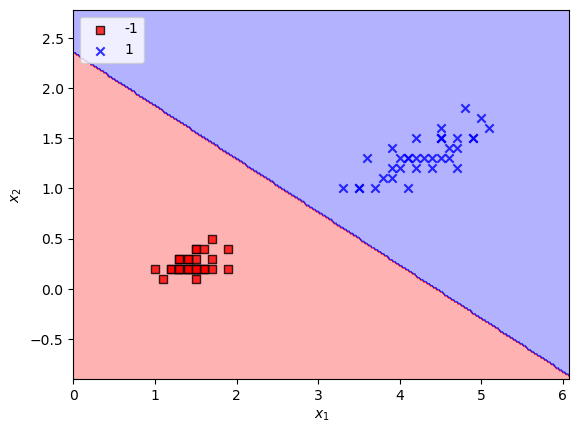

In [ ]:
def main():
    # pobiera danne do uczenia i testowania
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    # podział danych na testowe i treningowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    # selekcja danych z klas 0 i 1
    X_train_01_subset = X_train [(y_train == 0) | (y_train == 1)]
    y_train_01_subset = y_train [(y_train == 0) | (y_train == 1)]
    # w perceptronie wyjście jest albo 1 albo -1    
    y_train_01_subset[(y_train_01_subset == 0)] = -1
    ppn = Perceptron(eta=0.1, n_iter=10)
    # uczenie modelu
    ppn.fit(X_train_01_subset, y_train_01_subset)

    # wyświetla wykres
    plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=ppn)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()
    

if __name__ == '__main__':
    main()

##2. Napisz klasyfikator wielo-klasowy przy użyciu regresji logistycznej. Dla każdej z klas użyj klasyfikatora binarnego. Przykład regresji logistycznej dla przypadku dwuklasowego znajduje się poniżej.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def predict_proba(self, X):
        net_input = self.net_input(X)
        return self.activation(net_input)   

C:\Users\jakpi\AppData\Local\Temp\ipykernel_31224\2382359667.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
C:\Users\jakpi\AppData\Local\Temp\ipykernel_31224\2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


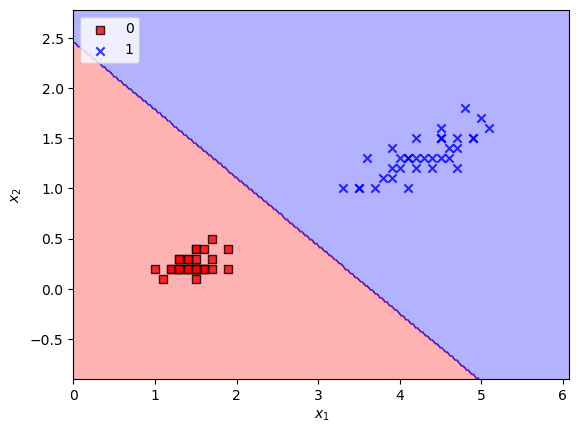

In [ ]:
def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    #w regresji logarytmicznej wyjście przyjmuje wartości 0 lub 1 (prawdopodobieństwa)
    X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
    y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
    lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd.fit(X_train_01_subset, y_train_01_subset)
    plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()

   
if __name__ == '__main__':
    main()

##3. Dla regresji logistycznej napisz metodę wypisującą prawdopodobieństwo przynależności próbki (próbek) do danej klasy (klas).

In [ ]:

def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    #w regresji logarytmicznej wyjście przyjmuje wartości 0 lub 1 (prawdopodobieństwa)
    X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
    y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
    lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd.fit(X_train_01_subset, y_train_01_subset)
    # Obliczenie prawdopodobieństw przynależności do klas
    probs = lrgd.predict_proba(X_test)

    # Obliczenie przewidywanych etykiet klas
    predicted_classes = lrgd.predict(X_test)

    # Tworzenie DataFrame z prawdopodobieństwami i przewidywanymi etykietami klas
    prob_df = pd.DataFrame(probs, columns=["Probability_Class_1"])
    prob_df["Probability_Class_0"] = 1 - prob_df["Probability_Class_1"]
    prob_df["Predicted_Class"] = predicted_classes
    prob_df["input x1"] = X_test[:,0]
    prob_df["input x2"] = X_test[:,1]

    # Mapowanie przewidywanych etykiet klas do nazw klas Iris
    class_name_mapping = {0: "Iris-setosa", 1: "Iris-versicolor"}
    prob_df["Predicted_Class_Name"] = prob_df["Predicted_Class"].map(class_name_mapping)

    # Zapisywanie DataFrame do pliku CSV
    prob_df.to_csv("probabilities_with_class.csv", index=False)



if __name__ == '__main__':
    main()

# Program

In [ ]:
class Classifier:
    def __init__(self, ppn1, ppn2):
        self.ppn1 = ppn1
        self.ppn2 = ppn2

    def predict(self, x):
        return np.where(self.ppn1.predict(x) == 1, 0, np.where(self.ppn2.predict(x) == 1, 2, 1))
    
def accuracy(y_results, y_train):
    return (1 - np.mean(y_results != y_train)) * 100

Perceptron #1 accuracy:  100.0
Perceptron #2 accuracy:  96.19047619047619
Total accuracy:  96.19047619047619


C:\Users\jakpi\AppData\Local\Temp\ipykernel_31224\2382359667.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
C:\Users\jakpi\AppData\Local\Temp\ipykernel_31224\2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


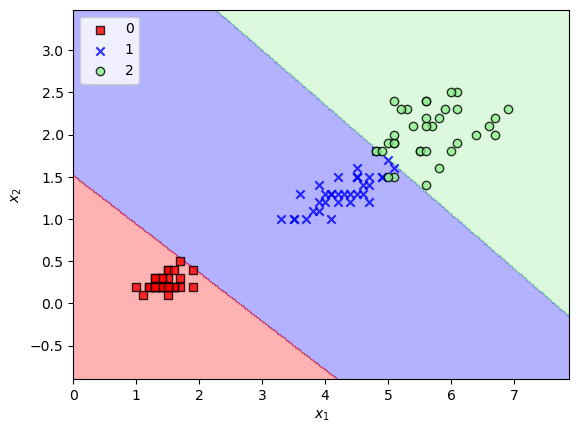

In [ ]:
def main():
    # Downloads test and training data
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y) # Divide downloaded data into testing and training data

    

    y_train_01_subset = y_train.copy()
    y_train_02_subset = y_train.copy()
    X_train_01_subset = X_train.copy()

    y_train_01_subset[(y_train == 1) | (y_train == 2)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1

    y_train_02_subset[(y_train == 1) | (y_train == 0)] = -1
    y_train_02_subset[(y_train_02_subset == 2)] = 1

   # nauka perceptronow
    ppn1 = Perceptron(eta=0.1, n_iter=350)
    ppn1.fit(X_train_01_subset, y_train_01_subset)

    ppn2 = Perceptron(eta=0.1, n_iter=350) 
    ppn2.fit(X_train_01_subset, y_train_02_subset)

    y1_predict = ppn1.predict(X_train)
    y2_predict = ppn2.predict(X_train)

    accuracy_1 = accuracy(ppn1.predict(X_train), y_train_01_subset)
    accuracy_2 = accuracy(ppn2.predict(X_train), y_train_02_subset)
    print("Perceptron #1 accuracy: ", accuracy_1)
    print("Perceptron #2 accuracy: ", accuracy_2)

    # obliczanie dokladnosci dla calego setu

    if accuracy_1 > accuracy_2:
        y_results = np.where(y1_predict == 1, 0, np.where(y2_predict == 1, 2, 1))
    
    else:
        y_results = np.where(y2_predict == 1, 2, np.where(y1_predict == 1, 0, 1))

    print("Total accuracy: ", accuracy(y_results, y_train))

    _classifier = Classifier(ppn1, ppn2)

    # rysowanie grafu
    plot_decision_regions(X = X_train, y = y_train, classifier=_classifier)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()

Perceptron #1 accuracy:  97.77777777777777
Perceptron #2 accuracy:  97.77777777777777
Total accuracy:  95.55555555555556


C:\Users\jakpi\AppData\Local\Temp\ipykernel_31224\2382359667.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
C:\Users\jakpi\AppData\Local\Temp\ipykernel_31224\2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


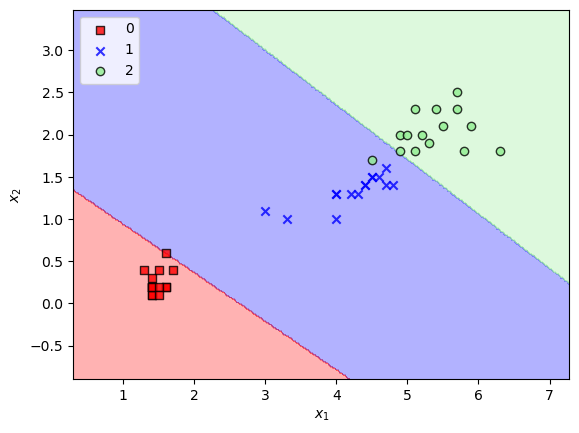

In [ ]:
def main():
    # Downloads test and training data
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y) # Divide downloaded data into testing and training data

    

    y_train_01_subset = y_train.copy()
    y_train_02_subset = y_train.copy()
    X_train_01_subset = X_train.copy()

    y_train_01_subset[(y_train == 1) | (y_train == 2)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1

    y_train_02_subset[(y_train == 1) | (y_train == 0)] = -1
    y_train_02_subset[(y_train_02_subset == 2)] = 1


    y_test_01_subset = y_test.copy()
    y_test_02_subset = y_test.copy()
    X_test_01_subset = X_test.copy()

    y_test_01_subset[(y_test == 1) | (y_test == 2)] = -1
    y_test_01_subset[(y_test_01_subset == 0)] = 1

    y_test_02_subset[(y_test == 1) | (y_test == 0)] = -1
    y_test_02_subset[(y_test_02_subset == 2)] = 1

   # nauka perceptronow
    ppn1 = Perceptron(eta=0.1, n_iter=350)
    ppn1.fit(X_train_01_subset, y_train_01_subset)

    ppn2 = Perceptron(eta=0.1, n_iter=350) 
    ppn2.fit(X_train_01_subset, y_train_02_subset)

    y1_predict = ppn1.predict(X_test)
    y2_predict = ppn2.predict(X_test)

    accuracy_1 = accuracy(ppn1.predict(X_test), y_test_01_subset)
    accuracy_2 = accuracy(ppn2.predict(X_test), y_test_02_subset)
    print("Perceptron #1 accuracy: ", accuracy_1)
    print("Perceptron #2 accuracy: ", accuracy_2)

    # obliczanie dokladnosci dla calego setu

    if accuracy_1 > accuracy_2:
        y_results = np.where(y1_predict == 1, 0, np.where(y2_predict == 1, 2, 1))
    
    else:
        y_results = np.where(y2_predict == 1, 2, np.where(y1_predict == 1, 0, 1))

    print("Total accuracy: ", accuracy(y_results, y_test))

    _classifier = Classifier(ppn1, ppn2)

    # rysowanie grafu
    plot_decision_regions(X = X_test, y = y_test, classifier=_classifier)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()